# Lancamento Balistico

* Lancamento Obliquo
* Arrasto Aerodinâmico



## Bibliotecas Utilizadas:

In [79]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

## Lançamento Balistico (sem arrasto)

Variáveis:

In [80]:
velocidade_inicial = 50 #m/s
angulo = m.radians(30) #graus
posicao_inicial = 0

instante = 0.0 #tempo t em segundos

gravidade = 9.8

v_x = velocidade_inicial * m.cos(angulo)

v_y = velocidade_inicial * m.sin(angulo)

tempo_subida = v_y/gravidade

tempo_total = 2*(tempo_subida)

tempos = np.linspace(0.0, round(tempo_total, 3))

posX = v_x * tempos[0]

alcance = posicao_inicial + v_x * tempo_total

altura_maxima = posicao_inicial + (v_y * tempo_subida) - ((gravidade*tempo_subida**2)/2)

velocidade_instantanea_x = v_x #Constante, pois não tem arrasto aerodinâmico

## Função que realiza o lançamento:
* Parametros: Posição atual, Velocidade $x$, Velocidade $y$, *tempo atual*, aceleração(gravidade nesse caso)
* Retorno: Array com 

  *   Velocidade $y$
  *   Velocidade $x$
  *   Posição Atual



In [81]:
def lancamento(posX, velX, velY, tempo, gravidade):
    posX = posX + v_x * tempo
    posY = posicao_inicial + v_y * tempo - ((gravidade*tempo**2)/2)
    velY = v_y - (gravidade * tempo)
    angulo_instante = m.degrees(m.atan(velY/v_x))
    # print("{:1.2f}  {:5.2f}  {:5.2f}  {:5.2f}  {:5.2f}  {:5.2f}".format(tempo, posX, posY, velY, v_x, angulo_instante))
    return np.array([velY, posY, velX, posX])

tempo  posX  posY   velY   velX  angulo


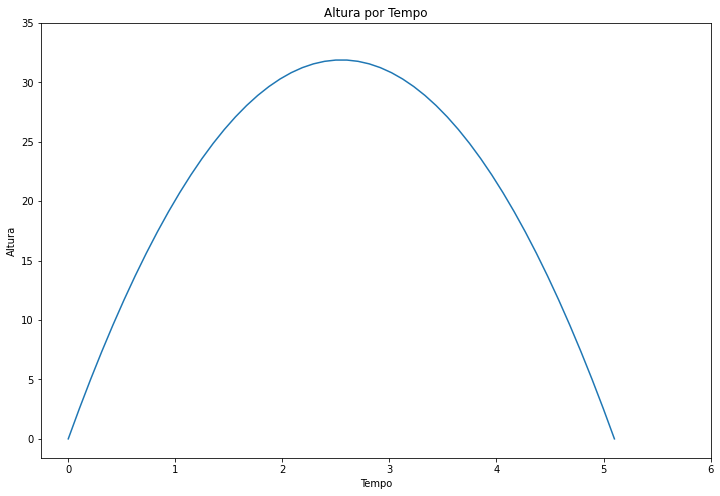

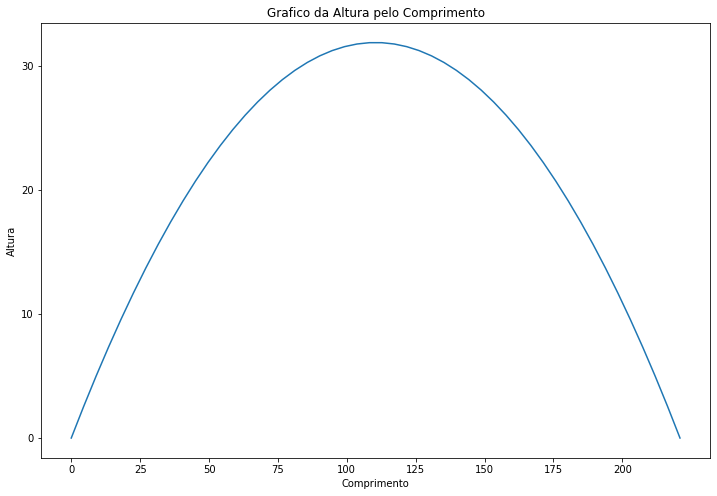

In [82]:
dados = np.empty(tempos.size, dtype=object)
alturas = np.empty(tempos.size, dtype=float)
comprimentos = np.empty(tempos.size, dtype=float)

print("tempo  posX  posY   velY   velX  angulo")
j = 0
for i in tempos:
    dados[j] = lancamento(posX, v_x, v_y, tempos[j], gravidade)
    alturas[j] = dados[j][1]
    comprimentos[j] = dados[j][3]
    j += 1

fig1, t_h = plt.subplots()
fig1.set_size_inches(12, 8)

t_h.plot(tempos, alturas)

plt.xticks(range(0, round(tempo_total) + 2));
plt.yticks(range(0, round(altura_maxima) + 5, 5))

t_h.set_title("Altura por Tempo")
t_h.set_xlabel("Tempo")
t_h.set_ylabel("Altura")

fig2, y_x = plt.subplots()
fig2.set_size_inches(12,8)

y_x.plot(comprimentos, alturas)

plt.xticks(range(0, round(alcance), 25))
plt.yticks(range(0, round(altura_maxima) + 5, 10))

y_x.set_title("Grafico da Altura pelo Comprimento")
y_x.set_xlabel("Comprimento")
y_x.set_ylabel("Altura")


plt.show()
